In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import math

from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline
%autosave 60

Autosaving every 60 seconds


In [8]:
file15=glob.glob("Database" + "151.txt")
file16=glob.glob("*161.txt")
len(file15),len(file16)

SyntaxError: invalid syntax (<ipython-input-8-7386af3a2ef2>, line 1)

### Figura 1

In [92]:
df_dP15=pd.DataFrame()
df_dP16=pd.DataFrame()

# df_temp=pd.DataFrame()

In [4]:
for fn in range(len(file15)):
    ###-fazendo a leitura dos dados
    df_imp=pd.read_csv(file15[fn],delimiter=" ",header=None)
    df_imp=df_imp[[0,1]] #extraindo apenas as colunas de interesse
    df_imp[0]=df_imp[0].str.slice(11, 19) #extraindo apenas os horarios

    ###-fazendo a transformação das horas
    df0=df_imp[0].str.slice(0,2).astype(int) #extraindo o valor das horas
    df1=df_imp[0].str.slice(3,5).astype(int)/60. #extraindo o valor dos minutos.
    df_imp[0]=df0+df1 #transformando em decimal.

    ###-Tomando a media movel e extraindo a dP
    df_imp_mean=df_imp[1].rolling(30).mean()
    dP=df_imp[1]-df_imp_mean

    ###-Nomes das colunas
    station_name=file15[fn][0:4].upper()

    ###-Alimentando as colunas
    if fn==0:
        df_dP15['time']=df_imp[0]
    else:
        df_dP15[station_name]=dP

In [5]:
for fn in range(len(file16)):
    ###-fazendo a leitura dos dados
    df_imp=pd.read_csv(file16[fn],delimiter=" ",header=None)
    df_imp=df_imp[[0,1]] #extraindo apenas as colunas de interesse
    df_imp[0]=df_imp[0].str.slice(11, 19) #extraindo apenas os horarios

    ###-fazendo a transformação das horas
    df0=df_imp[0].str.slice(0,2).astype(int) #extraindo o valor das horas
    df1=df_imp[0].str.slice(3,5).astype(int)/60. #extraindo o valor dos minutos.
    df_imp[0]=df0+df1 #transformando em decimal.

    ###-Tomando a media movel e extraindo a dP
    df_imp_mean=df_imp[1].rolling(30).mean()
    dP=df_imp[1]-df_imp_mean

    ###-Nomes das colunas
    station_name=file16[fn][0:4].upper()

    ###-Alimentando as colunas
    if fn==0:
        df_dP16['time']=df_imp[0]
    else:
        df_dP16[station_name]=dP

In [8]:
df_sta=pd.read_csv('Stations.dat',delimiter=" ")
df_sta=df_sta.set_index('Estacao')

In [9]:
estation='BRAZ'
coord_lon=df_sta['lon'][estation]
coord_lat=df_sta['lon'][estation]




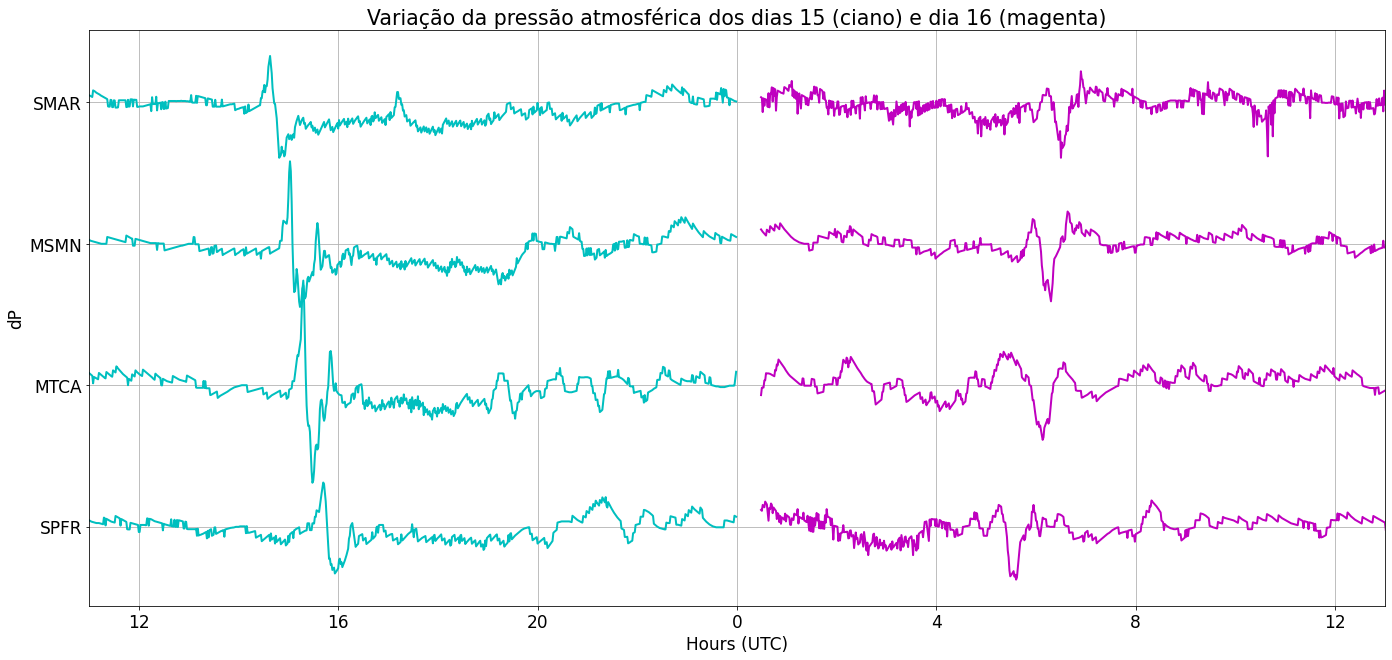

In [11]:
fig=plt.figure()
plt.rcParams['figure.figsize']=[30,10]
plt.rcParams.update({'font.size':17})

ax = fig.add_axes([0.1,0.1,0.6,0.8])

stations=['SMAR','MSMN','MTCA','SPFR']
factor=2
for i in range(4):
    off_set=-i*factor
    ax.plot(df_dP15['time'],df_dP15[stations[i]]+off_set,'c',lw=2)
    ax.plot(df_dP16['time']+24,df_dP16[stations[i]]+off_set,'m',lw=2)

# ax.plot(df_dP15['time'],df_dP15['MSBL']+off_set,'c',lw=1)
# ax.plot(df_dP16['time']+24,df_dP16['MSBL']+off_set,'m',lw=1)

# ax.plot(df_dP15['time'],df_dP15['MSBL']+off_set,'c',lw=1)
# ax.plot(df_dP16['time']+24,df_dP16['MSBL']+off_set,'m',lw=1)

# ax.plot(df_dP15['time'],df_dP15['MSBL']+off_set,'c',lw=1)
# ax.plot(df_dP16['time']+24,df_dP16['MSBL']+off_set,'m',lw=1)

#fig.legend(bbox_to_anchor=(1.0, 1.0))
    
ax.set_xlabel('Hours (UTC)')
ax.set_ylabel('dP')
ax.set_xlim(11,37)
plt.xticks([12,16,20,24,28,32,36],[12,16,20,0,4,8,12])
plt.yticks([0,-2,-4,-6],stations)
ax.set_title('Variação da pressão atmosférica dos dias 15 (ciano) e dia 16 (magenta)')
ax.grid(True)

#ax.legend()
fig.savefig('Dia15_all_stations.pdf')

### Figura 2

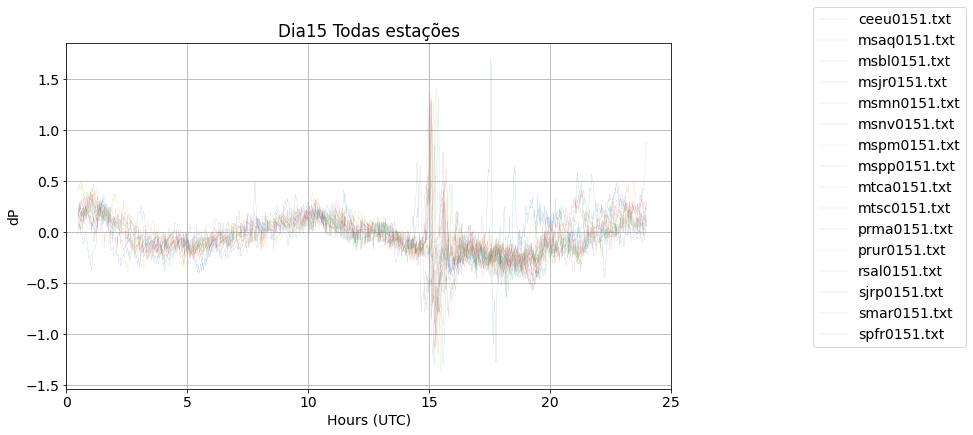

In [20]:
fig=plt.figure()
plt.rcParams['figure.figsize']=[14,6]
plt.rcParams.update({'font.size':14})
#plt.subplots(figsize=(6, 2))
ax = fig.add_axes([0.1,0.1,0.6,0.8])
for fn in range(len(file15)):
    ###-fazendo a leitura dos dados
    df_imp=pd.read_csv(file15[fn],delimiter=" ",header=None)
    df_imp=df_imp[[0,1]] #extraindo apenas as colunas de interesse
    df_imp[0]=df_imp[0].str.slice(11, 19) #extraindo apenas os horarios

    ###-fazendo a transformação das horas
    df0=df_imp[0].str.slice(0,2).astype(int) #extraindo o valor das horas
    df1=df_imp[0].str.slice(3,5).astype(int)/60. #extraindo o valor dos minutos.
    df_imp[0]=df0+df1 #transformando em decimal.

    ###-Tomando a media movel e extraindo a dP
    df_imp_mean=df_imp[1].rolling(30).mean()
    dP=df_imp[1]-df_imp_mean
    
    ##-Definindo alguns nomes para as figuras
    lab=file15[fn][0:4].upper()+' '+file15[fn][5:7]
    file_out=file15[fn][0:4]+file15[fn][5:7]+'.pdf'
    
    ##-Plotando as figuras
    ax.plot(df_imp[0],dP,lw=0.1,label=file15[fn])
    #ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
fig.legend(bbox_to_anchor=(1.0, 1.0))
    
ax.set_xlabel('Hours (UTC)')
ax.set_ylabel('dP')
ax.set_xlim(0, 25)
ax.set_title('Dia15 Todas estações')
ax.grid(True)

#ax.legend()
fig.savefig('Dia15_all_stations.pdf')

### Retirando os valores dos picos  
### Para o dia 15

In [108]:
col_names=['Estacao','hora','dP_max']
df_max = pd.DataFrame([['nan','nan','nan']], columns=col_names)

for fn in range(len(file15)):
    ###-fazendo a leitura dos dados
    df_imp=pd.read_csv(file15[fn],delimiter=" ",header=None)
    df_imp=df_imp[[0,1]] #extraindo apenas as colunas de interesse
    df_imp[0]=df_imp[0].str.slice(11, 19) #extraindo apenas os horarios

    ###-fazendo a transformação das horas
    df0=df_imp[0].str.slice(0,2).astype(int) #extraindo o valor das horas
    df1=df_imp[0].str.slice(3,5).astype(int)/60. #extraindo o valor dos minutos.
    df_imp[0]=df0+df1 #transformando em decimal.

    ###-Tomando a media movel e extraindo a dP
    df_imp_mean=df_imp[1].rolling(30).mean()
    dP=df_imp[1]-df_imp_mean
    df_imp[0][dP.idxmax()]

    sta=file15[fn][0:4].upper()
    hour='{:.5f}'.format(df_imp[0][dP.idxmax()])
    dP_max='{:.5f}'.format(dP[dP.idxmax()])

    df_temp = pd.DataFrame([[sta,hour,dP_max]], columns=col_names)
    df_max=df_max.append(df_temp)

#df_max
df_max=df_max.reset_index()
del df_max['index']
df_max.drop(0,inplace=True)
df_max.sort_values(by=['hora'])

df_max.to_excel("output.xlsx") 

### Dando entrada nos arquivos das coordenadas

In [109]:
df_sta=pd.read_csv('Stations.dat',delimiter=" ")

df_sta=pd.merge(df_sta, df_max,how='inner',on='Estacao')

df_sta=df_sta.sort_values(by=['hora'])
df_sta=df_sta.reset_index()
del df_sta['index']
df_sta['hora']=pd.to_numeric(df_sta['hora'])
df_sta['dP_max']=pd.to_numeric(df_sta['dP_max'])
df_sta

,lon,lat,alt,Estacao,hora,dP_max
0,-55.768840,-29.789445,117.207,RSAL,14.50000,0.68333
1,-53.716593,-29.718924,113.107,SMAR,14.63333,0.65667
2,-57.884022,-21.697692,97.337,MSPM,14.95000,1.24667
3,-56.530942,-22.106888,207.757,MSBL,15.01667,1.30333
4,-54.286585,-23.923543,325.505,MSMN,15.03333,1.16667
5,-55.608854,-22.621625,648.193,MSPP,15.03333,1.38000
6,-56.158980,-21.498447,289.777,MSJR,15.08333,1.31667
7,-54.192067,-23.022041,381.675,MSNV,15.10000,1.28000
8,-53.320661,-23.806084,475.302,PRUR,15.10000,1.07667
9,-55.671165,-20.452943,188.113,MSAQ,15.18333,1.27667


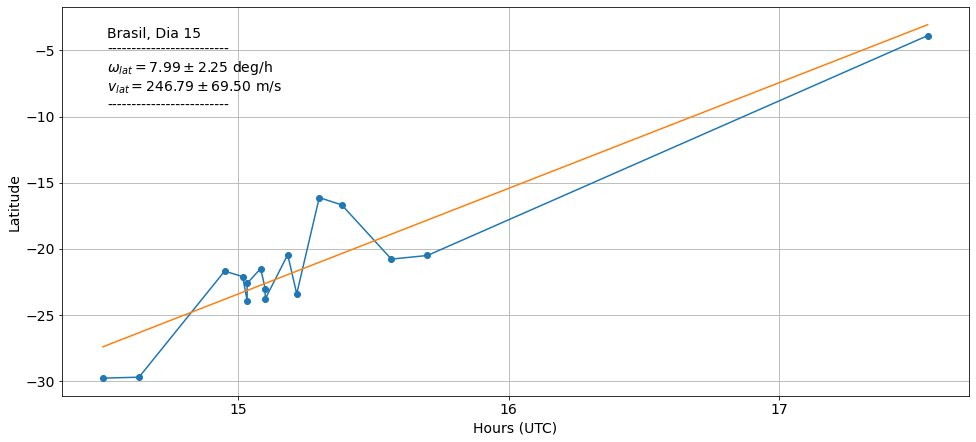

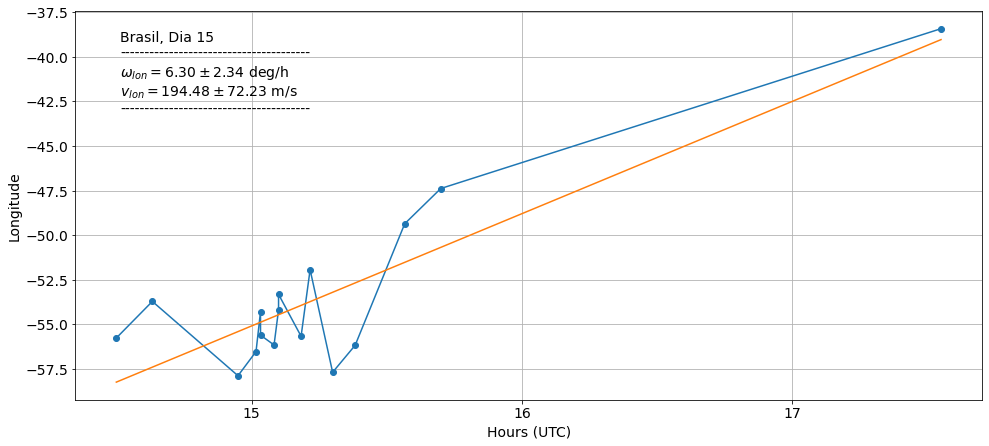

In [110]:
X=df_sta[['hora']]
y= df_sta[['lat']]

lm=LinearRegression()

lm.fit(X,y)
Y_fit = pd.DataFrame(lm.predict(X))

#############--dia15--------Latitude------------------############

fig=plt.figure()
plt.rcParams['figure.figsize']=[14,6]
plt.rcParams.update({'font.size':14})

ax = fig.add_axes([0.1,0.1,0.9,0.9])
ax.plot(X,y,marker='o')
ax.plot(X,Y_fit[0])

error=metrics.mean_squared_error(y,Y_fit)
error=np.sqrt(error)


Rt=6371000
ang_coef=lm.coef_

vel_tg=Rt*ang_coef*np.pi/(180*3600)
vel_lat=vel_tg
vel_error=error*Rt*np.pi/(180*3600)

textstr = '\n'.join((
    r'Brasil, Dia 15, Superficie',
    r'-------------------------',
    r'$\omega_{lat}=%.2f \pm %.2f$ deg/h' % (ang_coef,error),
    #r'$\omega_{lat}=%.8f$ rad/s' % (rad_s, ),
    r'$v_{lat}=%.2f \pm %.2f$ m/s' % (vel_tg,vel_error ),
    r'-------------------------',))

ax.grid(True)
ax.set_xticks([15,16,17])
ax.set_xlabel('Hours (UTC)')
ax.set_ylabel('Latitude')



ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top')


# ax.legend()
fig.savefig('time_vs_lat15.pdf')

#############--dia15--------Longitude------------------############

X=df_sta[['hora']]
y= df_sta[['lon']]

lm=LinearRegression()

lm.fit(X,y)
Y_fit = pd.DataFrame(lm.predict(X))


fig=plt.figure()
plt.rcParams['figure.figsize']=[14,6]
plt.rcParams.update({'font.size':14})


ax = fig.add_axes([0.1,0.1,0.9,0.9])
ax.plot(X,y,marker='o')
ax.plot(X,Y_fit[0])

error=metrics.mean_squared_error(y,Y_fit)
error=np.sqrt(error)


Rt=6371000
ang_coef=lm.coef_

vel_tg=Rt*ang_coef*np.pi/(180*3600)
vel_lat=vel_tg
vel_error=error*Rt*np.pi/(180*3600)

textstr = '\n'.join((
    r'Brasil, Dia 15, Superficie',
    r'---------------------------------------',
    r'$\omega_{lon}=%.2f \pm %.2f$ deg/h' % (ang_coef,error),
    #r'$\omega_{lat}=%.8f$ rad/s' % (rad_s, ),
    r'$v_{lon}=%.2f \pm %.2f$ m/s' % (vel_tg,vel_error ),
    r'---------------------------------------',))


ax.grid(True)
ax.set_xticks([15,16,17])
ax.set_xlabel('Hours (UTC)')
ax.set_ylabel('Longitude')

ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top')


# ax.legend()
fig.savefig('time_vs_lon15.pdf')

In [111]:
v_tg=np.sqrt(vel_lon**2 + vel_lat**2)
prop_angle = np.arctan(vel_lon/vel_lat)

v_tg,math.degrees(prop_angle)

(array([[275.03512266]]), 44.99999999999998)

## Retirando os valores dos picos para o dia 16

In [112]:
col_names=['Estacao','hora','dP_max']
df_max = pd.DataFrame([['nan','nan','nan']], columns=col_names)

for fn in range(len(file16)):
    ###-fazendo a leitura dos dados
    df_imp=pd.read_csv(file16[fn],delimiter=" ",header=None)
    df_imp=df_imp[[0,1]] #extraindo apenas as colunas de interesse
    df_imp[0]=df_imp[0].str.slice(11, 19) #extraindo apenas os horarios

    ###-fazendo a transformação das horas
    df0=df_imp[0].str.slice(0,2).astype(int) #extraindo o valor das horas
    df1=df_imp[0].str.slice(3,5).astype(int)/60. #extraindo o valor dos minutos.
    df_imp[0]=df0+df1 #transformando em decimal.

    ###-Tomando a media movel e extraindo a dP
    df_imp_mean=df_imp[1].rolling(30).mean()
    dP=df_imp[1]-df_imp_mean
#     df_imp[0][dP.idxmin()]

    sta=file16[fn][0:4].upper()
    hour='{:.5f}'.format(df_imp[0][dP.idxmin()])
    dP_max='{:.5f}'.format(dP[dP.idxmin()])

    df_temp = pd.DataFrame([[sta,hour,dP_max]], columns=col_names)
    df_max=df_max.append(df_temp)

#df_max
df_max=df_max.reset_index()
del df_max['index']
df_max.drop(0,inplace=True)
df_max.sort_values(by=['hora'])

# df_max.to_excel("output.xlsx") 

,Estacao,hora,dP_max
14,RNNA,3.80000,-0.87000
1,CEEU,3.88333,-0.84333
16,SPFR,5.60000,-0.75000
11,MTSC,5.95000,-0.61333
3,MSAQ,6.08333,-0.59333
12,PRMA,6.10000,-0.68333
10,MTCA,6.13333,-0.77333
5,MSJR,6.18333,-0.86667
9,MSPP,6.18333,-0.82667
13,PRUR,6.20000,-0.71667


In [113]:
df_sta=pd.read_csv('Stations.dat',delimiter=" ")

df_sta=pd.merge(df_sta, df_max,how='inner',on='Estacao')

df_sta=df_sta.sort_values(by=['hora'])
df_sta=df_sta.reset_index()
del df_sta['index']
df_sta['hora']=pd.to_numeric(df_sta['hora'])
df_sta['dP_max']=pd.to_numeric(df_sta['dP_max'])
df_sta

,lon,lat,alt,Estacao,hora,dP_max
0,-35.207708,-5.836141,45.965,RNNA,3.80000,-0.87000
1,-38.425541,-3.877549,21.749,CEEU,3.88333,-0.84333
2,-47.386642,-20.510574,1030.987,SPFR,5.60000,-0.75000
3,-56.174332,-16.687529,132.191,MTSC,5.95000,-0.61333
4,-55.671165,-20.452943,188.113,MSAQ,6.08333,-0.59333
5,-51.938424,-23.409688,543.365,PRMA,6.10000,-0.68333
6,-57.690839,-16.130468,147.301,MTCA,6.13333,-0.77333
7,-56.158980,-21.498447,289.777,MSJR,6.18333,-0.86667
8,-55.608854,-22.621625,648.193,MSPP,6.18333,-0.82667
9,-53.320661,-23.806084,475.302,PRUR,6.20000,-0.71667


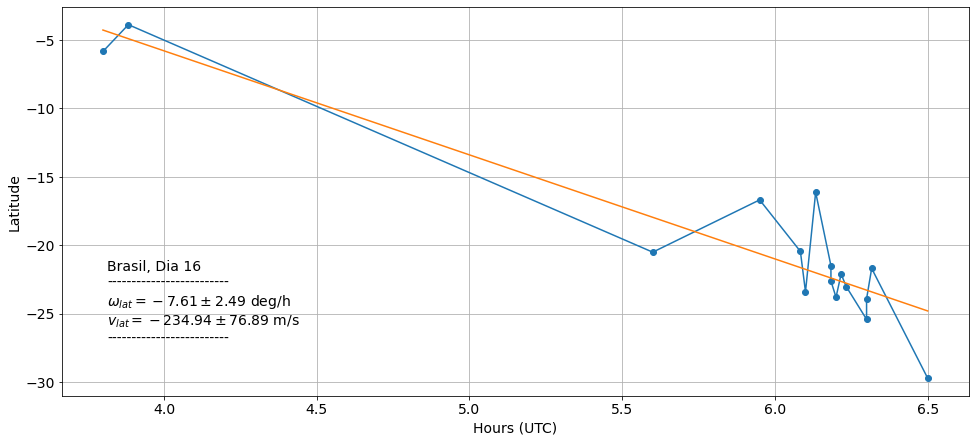

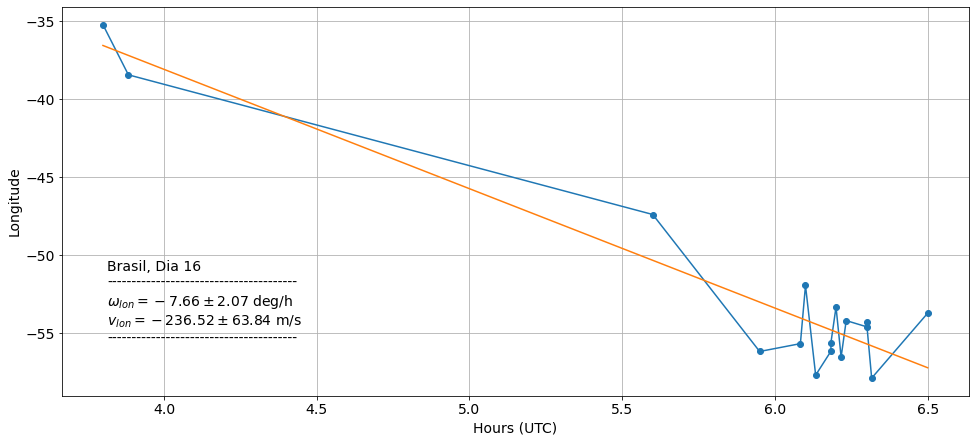

In [114]:
X=df_sta[['hora']]
y= df_sta[['lat']]

lm=LinearRegression()

lm.fit(X,y)
Y_fit = pd.DataFrame(lm.predict(X))

#############--dia15--------Latitude------------------############

fig=plt.figure()
plt.rcParams['figure.figsize']=[14,6]
plt.rcParams.update({'font.size':14})

ax = fig.add_axes([0.1,0.1,0.9,0.9])
ax.plot(X,y,marker='o')
ax.plot(X,Y_fit[0])

error=metrics.mean_squared_error(y,Y_fit)
error=np.sqrt(error)


Rt=6371000
ang_coef=lm.coef_

vel_tg=Rt*ang_coef*np.pi/(180*3600)
vel_lat=vel_tg
vel_error=error*Rt*np.pi/(180*3600)

textstr = '\n'.join((
    r'Brasil, Dia 16, Superficie',
    r'-------------------------',
    r'$\omega_{lat}=%.2f \pm %.2f$ deg/h' % (ang_coef,error),
    #r'$\omega_{lat}=%.8f$ rad/s' % (rad_s, ),
    r'$v_{lat}=%.2f \pm %.2f$ m/s' % (vel_tg,vel_error ),
    r'-------------------------',))

ax.grid(True)
# ax.set_xticks([15,16,17])
ax.set_xlabel('Hours (UTC)')
ax.set_ylabel('Latitude')



ax.text(0.05, 0.35, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top')


# ax.legend()
fig.savefig('time_vs_lat16.pdf')

#############--dia15--------Longitude------------------############

X=df_sta[['hora']]
y= df_sta[['lon']]

lm=LinearRegression()

lm.fit(X,y)
Y_fit = pd.DataFrame(lm.predict(X))


fig=plt.figure()
plt.rcParams['figure.figsize']=[14,6]
plt.rcParams.update({'font.size':14})


ax = fig.add_axes([0.1,0.1,0.9,0.9])
ax.plot(X,y,marker='o')
ax.plot(X,Y_fit[0])

error=metrics.mean_squared_error(y,Y_fit)
error=np.sqrt(error)


Rt=6371000
ang_coef=lm.coef_

vel_tg=Rt*ang_coef*np.pi/(180*3600)
vel_lat=vel_tg
vel_error=error*Rt*np.pi/(180*3600)

textstr = '\n'.join((
    r'Brasil, Dia 16, Superficie',
    r'---------------------------------------',
    r'$\omega_{lon}=%.2f \pm %.2f$ deg/h' % (ang_coef,error),
    #r'$\omega_{lat}=%.8f$ rad/s' % (rad_s, ),
    r'$v_{lon}=%.2f \pm %.2f$ m/s' % (vel_tg,vel_error ),
    r'---------------------------------------',))


ax.grid(True)
# ax.set_xticks([15,16,17])
ax.set_xlabel('Hours (UTC)')
ax.set_ylabel('Longitude')

ax.text(0.05, 0.35, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top')


# ax.legend()
fig.savefig('time_vs_lon16.pdf')

In [30]:
df_vel[0].std()

362.9543908103255

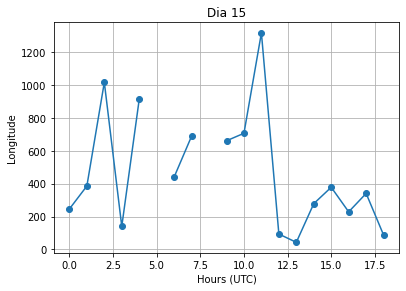

In [31]:
fig=plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(df_vel['index'],df_vel[0],marker='o')
#plt.xticks([0,5,11,17])
#plt.xticks([0,5,11,17],labels=['14:30','15:02','15:23','17:36'])

#ax.set_title(lab)
ax.grid(True)
#ax.set_xlim(14, 18)
ax.set_xlabel('Hours (UTC)')
ax.set_ylabel('Longitude')
ax.set_title('Dia 15')
fig.savefig('txlon15.pdf')